<a href="https://colab.research.google.com/github/sadaqatali1234/AI-Q2-learning-resources/blob/master/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
# importing libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# drive mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# data loading and reading
card=pd.read_csv("/content/gdrive/MyDrive/creditcard.csv")
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# statistcal description of dataframe
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# shape of dataframe
card.shape

(284807, 31)

In [6]:
# columns name of dataframe
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# check null values of dataframe
card.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
# check duplicated values in dataframe
card.duplicated().any()

True

In [10]:
# drop duplicated values 
card.drop_duplicates(inplace=True)

In [11]:
# check duplicated values again
card.duplicated().any()

False

In [12]:
# check again dataframe shape
card.shape

(283726, 31)

In [13]:
# dataframe spliting into Data(X) & label (Y)
data=card.iloc[:,:30]
label=card.iloc[:,-1]

In [14]:
# shape of data 
print(f"Shape of data is :{data.shape}\nShape of label is :{label.shape}")

Shape of data is :(283726, 30)
Shape of label is :(283726,)


In [17]:
X_train=data.sample(frac=0.7,random_state=1)
X_test=data.sample(frac=0.3,random_state=1)
y_train=label.sample(frac=0.7,random_state=1)
y_test=label.sample(frac=0.3,random_state=1)

In [18]:
# Check the shape of training data,testing data,training labels,testing labels
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(198608, 30)
shape of training label is :(198608,)
shape of testing data is :(85118, 30)
shape of testing label is :(85118,)


In [19]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33560,37283.0,-1.071719,-4.343904,-0.497727,-0.277591,-2.482346,-0.472073,0.991747,-0.414207,1.694252,-1.744176,-0.270013,1.145865,0.962904,-0.096612,1.407733,-0.294159,-0.082378,0.358518,0.284341,2.433118,0.856441,0.013647,-1.183439,0.536058,0.064148,-0.016945,-0.179133,0.236036,1217.00
57869,48115.0,1.314915,-0.980378,-0.032665,-2.770975,-1.047365,-0.705180,-0.491240,-0.076395,0.571959,-0.673573,1.537107,1.705658,0.460655,0.237690,0.578064,-2.936531,0.484655,1.091294,0.529313,-0.475477,-0.416346,-0.481886,-0.009117,0.009622,0.555844,-0.836622,0.099256,0.014826,26.31
187479,127554.0,-1.680526,-0.959150,-1.329705,-1.028361,-0.730922,0.253124,3.308312,-0.480062,0.157630,-2.012017,0.446700,0.299910,-0.376217,-1.451170,-1.833658,0.995288,-0.008342,0.811514,-0.795379,-0.030472,-0.084593,-0.204108,0.517400,-0.611013,-0.445912,-0.409744,0.231809,0.253554,680.91
243555,151975.0,2.114488,0.169976,-2.051966,0.070326,0.481642,-1.819440,0.886700,-0.673729,0.077960,-0.006214,-0.474817,0.697163,0.715022,0.655563,0.281635,-0.686316,-0.293587,-0.651840,0.092144,-0.174444,0.163748,0.642597,-0.058720,0.128632,0.461792,0.234073,-0.082360,-0.075323,12.92
96229,65675.0,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,7.407039,0.281109,-1.476121,-3.354760,-1.337504,1.010125,-0.712907,-0.650421,0.255434,0.820374,2.080629,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,28.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,20784.0,1.284475,-0.528597,-0.551952,-1.692217,1.390419,3.487251,-1.223489,0.875786,2.954982,-1.398574,0.756287,-1.875448,1.673656,1.405684,0.710533,-0.149641,0.081231,0.893577,0.720911,-0.015415,-0.208136,-0.272552,-0.070785,0.957666,0.636471,-0.711079,0.068018,0.024173,11.85
161025,113799.0,1.864717,0.479145,-0.928875,3.569045,0.588850,-0.002866,0.265924,-0.068823,-1.350931,1.707493,0.285300,0.130100,-0.131333,0.630459,-0.974334,1.206527,-1.278014,0.400213,-1.342140,-0.211711,0.277566,0.695070,-0.017524,-0.349246,0.121197,0.129562,-0.057625,-0.059907,37.93
49523,44099.0,-5.683239,-7.256650,0.302748,-0.280257,0.897762,-1.982932,-1.418865,0.451375,0.842029,-0.816007,-0.832281,0.839745,0.789651,-0.362290,0.855140,-2.656071,1.071795,1.089603,1.110404,-0.605478,-0.479498,0.010732,3.738808,0.069988,-0.101099,-0.099905,0.613607,-0.316037,329.74
171306,120580.0,2.130134,-0.103248,-1.507872,0.176722,0.339416,-0.623571,0.150423,-0.256019,0.647418,0.080347,-1.710156,-0.027125,0.015663,0.259630,0.141691,0.209131,-0.652673,-0.501624,0.538592,-0.200033,-0.358632,-0.910849,0.212119,-1.009854,-0.168465,0.260881,-0.074114,-0.070505,4.49


In [20]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [21]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')
#y_test=np.asarray(y_test).astype("float32")
#y_train=np.asarray(y_train).astype("float32")

In [22]:
val_x=X_train[:100000]
partial_x_train=X_train[100000:]
val_y=y_train[:100000]
partial_y_train=y_train[100000:]

In [23]:
from keras import models, layers , optimizers 

In [24]:
network=models.Sequential()
network.add(layers.Dense(6,activation="tanh",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4,activation="tanh"))
network.add(layers.Dense(1,activation="sigmoid"))

In [25]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 186       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


In [26]:
network.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [27]:

# model training on training data & validation data
history=network.fit(partial_x_train, partial_y_train,epochs=5, batch_size=20, verbose=1,validation_data=(val_x,val_y))

Epoch 1/5
4931/4931 [==============================] - 11s 2ms/step - loss: 0.1385 - accuracy: 0.9553 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/5
4931/4931 [==============================] - 10s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/5
4931/4931 [==============================] - 10s 2ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/5
4931/4931 [==============================] - 10s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/5
4931/4931 [==============================] - 10s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994


In [28]:
history_dict=history.history
history_dict.keys()
[u"loss",u"accuracy",u"val_loss",u"val_accuracy"]

['loss', 'accuracy', 'val_loss', 'val_accuracy']

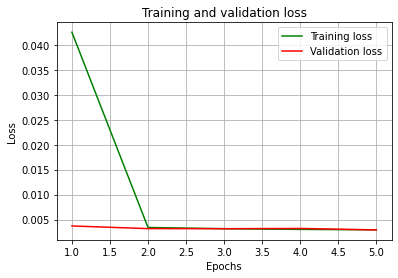

In [36]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"g",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

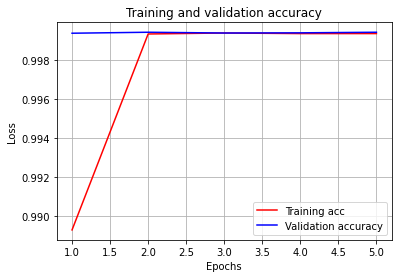

In [35]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [31]:
loss_1, accuracy = network.evaluate(X_test, y_test)

2660/2660 [==============================] - 4s 1ms/step - loss: 0.0033 - accuracy: 0.9994


In [32]:
print(f"loss on evaluation is :{loss_1}\naccuracy on evaluation is :{accuracy}")

loss on evaluation is :0.0032660781871527433
accuracy on evaluation is :0.9994008541107178


In [33]:
x_predict = network.predict(X_test)
x=x_predict//100

In [34]:
x = pd.DataFrame((x))
x

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
85113,0.0
85114,0.0
85115,0.0
85116,0.0
